In [2]:
import pandas as pd
df = pd.read_csv(r"Datasets\Boston.csv")
df.head(10)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
df.describe()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.mean()

Unnamed: 0    253.500000
crim            3.613524
zn             11.363636
indus          11.136779
chas            0.069170
nox             0.554695
rm              6.284634
age            68.574901
dis             3.795043
rad             9.549407
tax           408.237154
ptratio        18.455534
black         356.674032
lstat          12.653063
medv           22.532806
dtype: float64

In [5]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

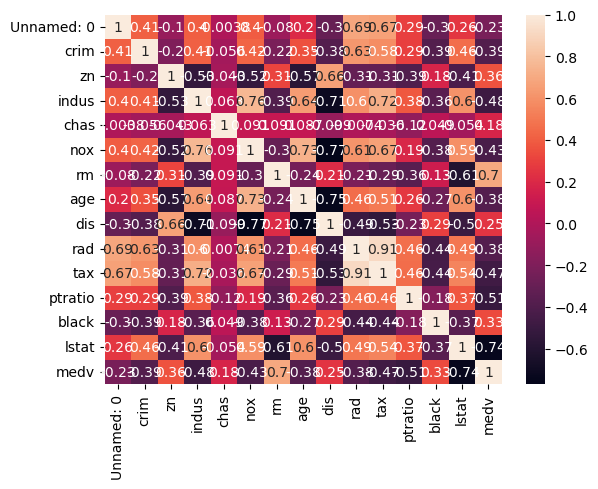

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.heatmap(df.corr(),annot=True) 
plt.show()


In [7]:
# we observed that lstat, ptratio and rm have high correlation with cost of flat (medv) # avoid variables which have more internal correlation 
# lstat and rm have high internal correlation 
# avoid lstat and rm together 
# 1. lstat, ptratio 
# 2. rm, ptratio 
# 3. lstat, rm, ptratio 


In [8]:
# Choosing input and output variables from correlation matrix 
X = df[['ptratio','lstat','rm']] #input variables 
y = df['medv'] #output variable 


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [13]:
print("Testing X")
X_test


Testing X


,ptratio,lstat,rm
202,14.7,3.11,7.610
13,21.0,8.26,5.949
169,14.7,11.32,6.402
197,12.6,8.61,7.107
461,20.2,14.65,6.376
...,...,...,...
448,20.2,18.13,6.185
326,19.6,6.15,6.312
449,20.2,19.31,6.417
129,21.2,18.34,5.637


In [14]:
print("Test Prediction y")
pred

Test Prediction y


array([37.05035584, 21.64282881, 27.20538963, 33.55323981, 20.19953664,
       30.25871055, 20.2899437 , 12.46769064, 37.60512728, 26.06007239,
       22.13656671, 12.95724534, 14.47002357, 21.99573654, 36.71111497,
       28.84417791, 27.45870373, 22.92775386, 12.14306336, 17.92190353,
       14.05007327, 29.94301327, 41.74903508, 16.98225454, 40.03708014,
       24.70869817, 35.35654738, 23.62699802, 35.01130023, 18.81760746,
       23.31786779, 26.35720465, 30.22514906, 32.21615889, 29.99640271,
       35.30363885, 19.90741162,  8.61090816, 12.35698103, 19.14689334,
       23.92457647, 13.42840249, 29.33395639, 12.55730803,  1.20060958,
       22.31529088, 21.12565174, 17.34331869, 27.47174895, 20.45773737,
       36.3741547 , 19.45646701, 17.5152308 , 30.58869986, 19.97473658,
       28.3149533 , 12.37233575,  1.86419065, 32.65605877, 19.87773438,
       32.17853128, 19.72994422, 24.42239612, 14.25974697, 23.64939234,
       25.46546209, 18.91738509, 21.60076636, 15.40994546, 27.42

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [16]:
sr = r2_score(y_test, pred)
mae = mean_absolute_error(y_test,pred)

In [17]:
print('R2 Score:',sr)
print('Mean Square Error:',mae)

R2 Score: 0.7681153529429009
Mean Square Error: 3.856360561178153


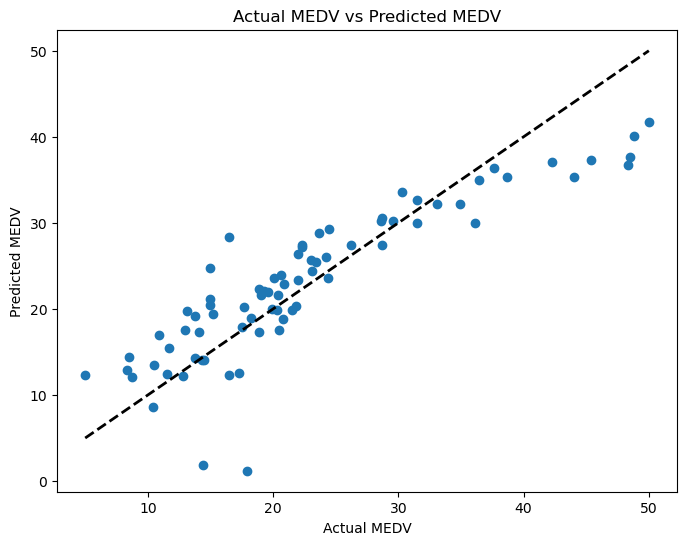

In [19]:
#visualization after fitting model
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual MEDV vs Predicted MEDV')
plt.show()
print("\n")